### **PROJECT: Horse or Human Classification using CNN**
**We have data for training:**

* 500 horse images
* 527 human(male & female) images

**For validation:**
* 122 horse images* 
123 human(male & female) image
  s*)

### **PROBLEM STATEMENT:Classify given image is horse or human(male/female)**

### **SOLUTION:To solve this problem we are going to use Deep Learning Algorithm that is CNN (Convolutional Neural Network)**

### **DATASET USED:**

Raw Data Scource: https://www.kaggle.com/sanikamal/horses-or-humans-dataset

### **LOAD LIBRARIES**

In [ ]:
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
##
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [ ]:
keras.__version__

'2.3.1'

### **LOAD DATA**

In [ ]:
train_data_path = "/content/drive/My Drive/My ML Project /DL Project/CNN/horse-or-human/dataset/train"
validation_data_path = "/content/drive/My Drive/My ML Project /DL Project/CNN/horse-or-human/dataset/validation"

### **DATA PREPROCESSING**

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')


In [ ]:
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 245 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

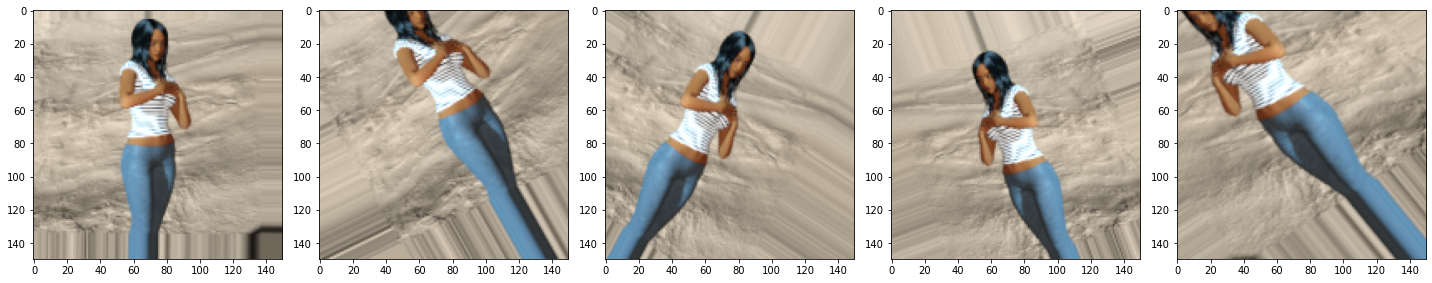

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

### **BUILDING CNN MODEL**

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                         
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                     
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

### **COMPILE CNN MODEL**

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

### **TRAIN CNN MODEL**

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
 6/33 [====>.........................] - ETA: 10:03 - loss: 1.1178 - accuracy: 0.5573

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/33 [=============>................] - ETA: 7:19 - loss: 1.1285 - accuracy: 0.5957

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


33/33 [==============================] - 850s 26s/step - loss: 1.0470 - accuracy: 0.6368 - val_loss: 0.7096 - val_accuracy: 0.5020

Epoch 00001: val_accuracy improved from -inf to 0.50204, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/horse-or-human/horse_or_human_predictor.h5
Epoch 2/100
33/33 [==============================] - 14s 432ms/step - loss: 0.7956 - accuracy: 0.6894 - val_loss: 0.7903 - val_accuracy: 0.5020

Epoch 00002: val_accuracy did not improve from 0.50204
Epoch 3/100
33/33 [==============================] - 15s 441ms/step - loss: 0.7006 - accuracy: 0.7439 - val_loss: 1.3628 - val_accuracy: 0.5020

Epoch 00003: val_accuracy did not improve from 0.50204
Epoch 4/100
33/33 [==============================] - 15s 445ms/step - loss: 0.6761 - accuracy: 0.7634 - val_loss: 1.4415 - val_accuracy: 0.5020

Epoch 00004: val_accuracy did not improve from 0.50204
Epoch 5/100
33/33 [==============================] - 15s 444ms/step - loss: 0.6780 - accuracy: 0.7

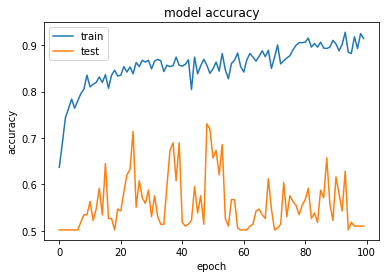

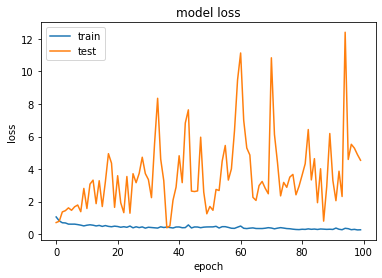

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()